<a href="https://colab.research.google.com/github/Hamadahoda/Fellowship_AI_IMDB_Ahmed/blob/main/Ahmed_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Code Assesment: IMDB Sentiment Analysis

> <img src="https://m.media-amazon.com/images/G/01/imdb/images/social/imdb_logo.png" alt="IMDB Logo" width="400" height="80%">

# Installing Packages

In [ ]:
!pip install texthero
!pip install -U spacy
!pip install datasets
!pip install emoji
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.3.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached thinc-7.4.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached srsly-1.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (209 kB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.6
    Uninstalling srsly-2.4.6:
      Successfully uninstalled srsly-2.4.6
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.9
    Uninstalling thinc-8.1.9:
      Successfully uninstalled thinc-8.1.9
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.

In [ ]:
!python -m spacy download en_core_web_sm

2023-04-13 09:43:50.107760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 09:43:51.185648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-13 09:43:53.107778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-13 09:43:53.108333: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

# Import Packages & Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import texthero as hero
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from datasets import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import emoji
import nltk
nltk.download('punkt')
nltk.download('wordnet')

import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
import torch


import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

# callbacks are important here as sometimes you get the best accuracy earlies and then it 
# goes down so as to stop the training there you need to use them


from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the data

In [ ]:
imdb_data = load_dataset('imdb')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Converting the data to a datafram to better explore the data
df_train = pd.DataFrame(imdb_data['train'])
df_test = pd.DataFrame(imdb_data['test'])

In [ ]:
df = pd.concat((df_train,df_test))

In [ ]:
df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,Just got around to seeing Monster Man yesterda...,1
24996,I got this as part of a competition prize. I w...,1
24997,I got Monster Man in a box set of three films ...,1
24998,"Five minutes in, i started to feel how naff th...",1


# EDA: Exploratory Data Analysis of the data

In [ ]:
# Checking for NaN values
df_train.isnull().sum().sort_values(ascending=False)

text     0
label    0
dtype: int64

In [ ]:
# Checking fore dublicated data
df_train.duplicated().value_counts()

False    24904
True        96
dtype: int64

In [ ]:
# Removing duplicated rows from the dataset
df_train = df_train.drop_duplicates()

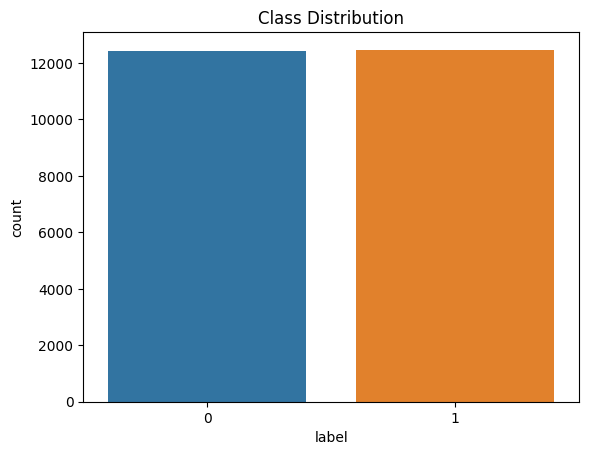

Class 0: 12432, Class 1: 12472


In [ ]:
# Checking if the labels is unbalanced
sns.countplot(x='label', data=df_train)
plt.title('Class Distribution')
plt.show()

# To get the count for each label, to make sure the data is unbalanced since the graph doesn't show
print(f"Class 0: {df_train['label'].value_counts()[0]}, Class 1: {df_train['label'].value_counts()[1]}")

# Preprocessing & Cleaning the data

## (1) Using TextHero to clean the text

> TextHero is used to clean text, and just leave the most important parts that would be useful for the the model<br>

> The cleaning operation that is done on the text <br>

>(1) Removing WhiteSpaces <br>
(2) Removing StopWords <br>
(3) Removing Punctuation <br>
(4) Removing Html Tgs <br>
(5) Removing LowerCase Letters <br>
(6) Removing Digits <br>
(7) Removing Urls <br>
(8) Replace NaN values with empty string

In [ ]:
clean_texthero_pipeline = [
    hero.preprocessing.remove_whitespace,
    hero.preprocessing.remove_stopwords,
    hero.preprocessing.remove_punctuation,
    hero.preprocessing.remove_html_tags,
    hero.preprocessing.lowercase,
    hero.preprocessing.remove_digits,
    hero.preprocessing.remove_urls,
    hero.preprocessing.fillna,
]

df_train['cleaned_text'] = hero.clean(df_train['text'], clean_texthero_pipeline)

## (2) Lemmatization 

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))

def lemmatize_text(text):
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words
    words = [w for w in words if not w.lower() in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(w) for w in words]
    # Join words to form the original text
    return " ".join(words)

df_train['cleaned_text'] = df_train['cleaned_text'].apply(lemmatize_text)

## (3) Removing Emojes 

> Since alot of movie reviewers, write their review using their phones, that means there is the posibility that the reviewer will use an emoji. Since typing on the phone will can trigger someone and type an emoji  by an accident


> First we need to know if there is any emojes used in the text, we do this by using the emojes_count function, then we will replace the emojies with text for what the emoji represent.

In [ ]:
# Checking for Emojies

def count_emj(text):
  return emoji.emoji_count(text)

df_train['count'] = df_train['text'].apply(count_emj)

df_train['count'].value_counts()

0    24900
1        4
Name: count, dtype: int64

In [ ]:
# Since there isn't much emojies in the text, we can either drop the rows, or replace the emojies.
# Since replacing the emojies won't be difficult we will jusr replace them

def demojize_text(text):
    return emoji.demojize(text)

df_train['cleaned_text'] = df_train['cleaned_text'].apply(demojize_text)

In [ ]:
df_test['cleaned_text'] = hero.clean(df_test['text'], clean_texthero_pipeline)
df_test['cleaned_text'] = df_test['cleaned_text'].apply(lemmatize_text)
df_test['cleaned_text'] = df_test['cleaned_text'].apply(demojize_text)

# First Solution: Using Traditional Machine Learning Models

## The Traditional Models used 


1.   XGBOOST
2.   Logestic Regression
3.   Random Forest



> Steps Taken in Buikding Every Model Pipeline



1.   Setting the paramter Space
2.   initializing the pipeline with tf-idf vectorizer
3.   Picking the type of search in the model paramter space 
4.   Starting the training


## XGBOOST Model

In [ ]:
param_xgb = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__n_estimators': [100, 200, 500], 
}



xgb_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('xgb', XGBClassifier())
])


xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_xgb,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)


xgb_search.fit(df_train['cleaned_text'], df_train['label'])


print("The Best Hyperparameters for XGB Model:", xgb_search.best_params_)


The Best Hyperparameters for XGB Model: {'xgb__n_estimators': 500, 'xgb__max_depth': 7, 'tfidf__ngram_range': (1, 1)}


In [ ]:
xgb_pred = xgb_search.best_estimator_.predict(df_test['cleaned_text']) 86.4 94.1
print("XGB Model Accuracy:", accuracy_score(df_test['label'], xgb_pred))
print("XGB Model ROC AUC Score:", roc_auc_score(df_test['label'], xgb_search.best_estimator_.predict_proba(df_test['cleaned_text'])[:,1]))

XGB Model Accuracy: 0.8646
XGB Model ROC AUC Score: 0.9410228319999999


## Logistic Regression

In [ ]:
param_lr = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'logreg__C': [0.1, 1, 10],
    'logreg__max_iter': [100, 500], 
}

lr_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

lr_random_search = RandomizedSearchCV(
    lr_model,
    param_distributions=param_lr,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)


lr_random_search.fit(df_train['cleaned_text'], df_train['label'])


print("The Best Hyperparameters for Logistic Regression Model:", lr_random_search.best_params_)

The Best Hyperparameters for Logistic Regression Model: {'tfidf__ngram_range': (1, 2), 'logreg__max_iter': 100, 'logreg__C': 10}


In [ ]:
lr_pred = lr_random_search.best_estimator_.predict(df_test['cleaned_text']) 88.9 95.6
print("Logistic Regression Model Accuracy:", accuracy_score(df_test['label'], lr_pred))
print("Logistic Regression Model ROC AUC Score:", roc_auc_score(df_test['label'], lr_random_search.best_estimator_.predict_proba(df_test['cleaned_text'])[:,1]))

Logistic Regression Model Accuracy: 0.88912
Logistic Regression Model ROC AUC Score: 0.9564276352000001


## Random Forest

In [ ]:
param_rf = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__n_estimators': [100, 200, 500],
}


rf_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])


rf_random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_rf,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)


rf_random_search.fit(df_train['cleaned_text'], df_train['label'])


print("The Best Hyperparameters for Random Forest Model:", rf_random_search.best_params_)

The Best Hyperparameters for Random Forest Model: {'tfidf__ngram_range': (1, 1), 'rf__n_estimators': 100, 'rf__max_depth': None}


In [ ]:
rf_pred = rf_random_search.best_estimator_.predict(df_test['cleaned_text'])
print("Random Forest Model Accuracy:", accuracy_score(df_test['label'], rf_pred))
print("Random Forest Model ROC AUC Score:", roc_auc_score(df_test['label'], rf_random_search.best_estimator_.predict_proba(df_test['cleaned_text'])[:,1]))

Random Forest Model Accuracy: 0.85124
Random Forest Model ROC AUC Score: 0.9266956704


# Second Solution: Using Trasnformers(BERT Model)

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from IPython.display import clear_output

# from transformers import BertTokenizer
# from transformers import TFBertForSequenceClassification

In [2]:
"""

Since bert accept data in tf tesnorshape, we can just extract the same dataset from the tensorflow datasets
this will skip a step for us.

"""

(ds_train, ds_test), ds_info = tfds.load('imdb_reviews',split = (tfds.Split.TRAIN, tfds.Split.TEST),as_supervised=True,with_info=True)
clear_output()

In [ ]:
# Downloading berts own tokenizer. that will tokenize the dataset according to the pretrained model bert
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
clear_output()

In [ ]:
# Max length of the text that can go to BERT
max_length = 512
batch_size = 6

In [ ]:
# function to convert the data to InputExample format, which the format that bert accept 

def convert_data_to_input(text):
  return tokenizer.encode_plus(text,
                add_special_tokens = True, 
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
bert_history = model.fit(train_data, epochs=number_of_epochs, validation_data=test_encoded)

3407/4167 [=======================>......] - ETA: 9:12 - loss: 0.2472 - accuracy: 0.8998

In [ ]:
# Taking the InputExample's features, and put it in a dictionary

def data_to_dict(input_ids, attention_masks, token_type_ids, label):
      return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
"""

In this fucntion we will pass the whole dataset, and use the convert_data_to_input to convert eacch row to the InputExampe 
format, then the data_to_dict function will but them in a dictionary. The most important step is the last one which 
converts the dictionary to tensors, to put it in one dataset.

"""

def data_encode(dataset, limit=-1):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    if (limit > 0):
        dataset = dataset.take(limit)
    for text, label in tfds.as_numpy(dataset):
        bert_input = convert_data_to_input(text.decode())
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([label])
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(data_to_dict)

In [ ]:
# converting the training dataset to pass to the bert model

train_data = data_encode(ds_train).shuffle(10000).batch(batch_size)
test_encoded = data_encode(ds_test).batch(batch_size)

In [ ]:
# According to bert documentation, which has a tutorial on similar task, the recommended learning rate is 2e-5 ,and number of epoch is 3
learning_rate = 2e-5
# Although the documentation recommend 3 epochs, my computing capability doesn't allow it. i currently use colab standard gpu supported.
number_of_epochs = 1
# specifying the bert model we will use 
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# specifying the optimizer the bert model will use
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)
# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
bert_history = model.fit(train_data, epochs=number_of_epochs, validation_data=test_encoded)

4167/4167 [==============================] - 4179s 988ms/step - loss: 0.2419 - accuracy: 0.9031 - val_loss: 0.1746 - val_accuracy: 0.9358


# Comparing Results

> |Model name|Roc Auc|Accuracy|
> |:---:|:---:|:---:|
> |Bert-Base-uncased Tuned| 96.6%| 90%|
> |Logistic Regression Model| 95.6%| 88.8%|
> |XGB Model | 94.1%| 86.4%|
> |RF Model| 92.6%| 85.1%|

# Observation

*   Since Logistic Regression Model can handle hig_dimensional data with less parameters, it performed better.


*   We can use demision reduction techniques to reduce the data dimension, so we can get better result

*   The best model as we expected was the bert model with 96.6 Roc Auc Score of 96.6%




